<a href="https://colab.research.google.com/github/OtolaHan/Otola_Han_KAAN/blob/main/Transfer_Learning1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications import MobileNetV2

# Загрузка предобученной модели MobileNetV2 без верхних слоев
pre_trained_model = MobileNetV2(input_shape=(160, 160, 3),
                                   include_top=False,
                                   weights='imagenet')

# Замораживаем веса предобученной модели
for layer in pre_trained_model.layers:
  layer.trainable = False

# Проверка структуры модели
pre_trained_model.summary()

# Выбор последнего слоя для подключения новых слоев
last_layer = pre_trained_model.get_layer('out_relu')
print('last layer output shape:', last_layer.output_shape)
last_output = last_layer.output

9406464/9406464 [==============================] - 1s 0us/step
Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 160, 160, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 80, 80, 32)           864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 80, 80, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReL

In [3]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)
# Add a final sigmoid layer for classification
x = layers.Dense  (1, activation='sigmoid')(x)

model = Model( pre_trained_model.input, x)

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [4]:
!wget --no-check-certificate \
        https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
       -O /tmp/cats_and_dogs_filtered.zip

from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import zipfile

local_zip = '//tmp/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

# Define our example directories and files
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join( base_dir, 'train')
validation_dir = os.path.join( base_dir, 'validation')


train_cats_dir = os.path.join(train_dir, 'cats') # Directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs') # Directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats') # Directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')# Directory with our validation dog pictures

train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 20,
                                                    class_mode = 'binary',
                                                    target_size = (160, 160))

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory( validation_dir,
                                                          batch_size  = 20,
                                                          class_mode  = 'binary',
                                                          target_size = (160, 160))

--2024-04-21 16:25:43--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.10.207, 142.251.12.207, 172.217.194.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.10.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  20.3MB/s    in 4.3s    

2024-04-21 16:25:48 (15.1 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [5]:
history = model.fit_generator(
       train_generator,
       validation_data=validation_generator,
       steps_per_epoch=100,
       epochs=20,
       validation_steps=50,
       verbose=2)

<ipython-input-5-d18a294a0d55>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/20
100/100 - 25s - loss: 3.8620 - accuracy: 0.8655 - val_loss: 0.5464 - val_accuracy: 0.9480 - 25s/epoch - 246ms/step
Epoch 2/20
100/100 - 19s - loss: 0.4942 - accuracy: 0.9075 - val_loss: 0.2224 - val_accuracy: 0.9500 - 19s/epoch - 186ms/step
Epoch 3/20
100/100 - 18s - loss: 0.2721 - accuracy: 0.9300 - val_loss: 0.1409 - val_accuracy: 0.9620 - 18s/epoch - 178ms/step
Epoch 4/20
100/100 - 18s - loss: 0.2202 - accuracy: 0.9385 - val_loss: 0.1372 - val_accuracy: 0.9630 - 18s/epoch - 177ms/step
Epoch 5/20
100/100 - 17s - loss: 0.2076 - accuracy: 0.9380 - val_loss: 0.1346 - val_accuracy: 0.9670 - 17s/epoch - 167ms/step
Epoch 6/20
100/100 - 18s - loss: 0.1685 - accuracy: 0.9485 - val_loss: 0.1806 - val_accuracy: 0.9580 - 18s/epoch - 177ms/step
Epoch 7/20
100/100 - 17s - loss: 0.2088 - accuracy: 0.9420 - val_loss: 0.0883 - val_accuracy: 0.9650 - 17s/epoch - 167ms/step
Epoch 8/20
100/100 - 17s - loss: 0.1649 - accuracy: 0.9510 - val_loss: 0.1756 - val_accuracy: 0.9650 - 17s/epoch - 175

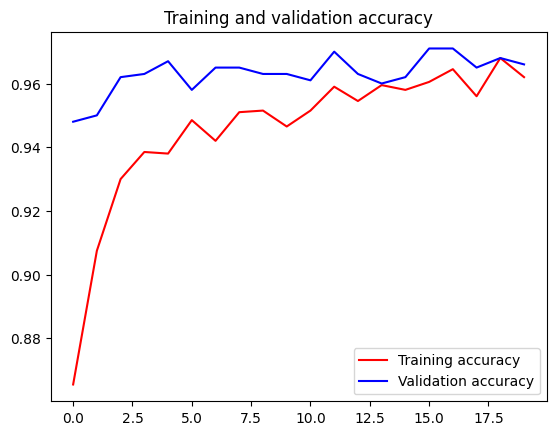

<Figure size 640x480 with 0 Axes>

In [6]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()